# Stage 1 - Importing all needed Libraries and reading the Data file

In [9]:
# Importing all the needed Libraries for the project
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('fivethirtyeight') # Use the ggplot style in rendering our graphs
from matplotlib.pyplot import figure
matplotlib.rcParams['figure.figsize'] = (12,8) # This will adjust the size of graphs when displayed

# To read our files into the dataframe and changing the Date datatype from object to Datetime64
sales = pd.read_csv('sales_data.csv', parse_dates=['Date'])
sales.head()

,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
0,2013-11-26,26,November,2013,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950
1,2015-11-26,26,November,2015,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950
2,2014-03-23,23,March,2014,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,23,45,120,1366,1035,2401
3,2016-03-23,23,March,2016,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,20,45,120,1188,900,2088
4,2014-05-15,15,May,2014,47,Adults (35-64),F,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,4,45,120,238,180,418


In [15]:
sales.tail()

,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
113031,2016-04-12,12,April,2016,41,Adults (35-64),M,United Kingdom,England,Clothing,Vests,"Classic Vest, S",3,24,64,112,72,184
113032,2014-04-02,2,April,2014,18,Youth (<25),M,Australia,Queensland,Clothing,Vests,"Classic Vest, M",22,24,64,655,528,1183
113033,2016-04-02,2,April,2016,18,Youth (<25),M,Australia,Queensland,Clothing,Vests,"Classic Vest, M",22,24,64,655,528,1183
113034,2014-03-04,4,March,2014,37,Adults (35-64),F,France,Seine (Paris),Clothing,Vests,"Classic Vest, L",24,24,64,684,576,1260
113035,2016-03-04,4,March,2016,37,Adults (35-64),F,France,Seine (Paris),Clothing,Vests,"Classic Vest, L",23,24,64,655,552,1207


# Stage 2 - Understanding our Data

In [10]:
# Check for column name, missing values, dtype, total number of records
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113036 entries, 0 to 113035
Data columns (total 18 columns):
Date                113036 non-null datetime64[ns]
Day                 113036 non-null int64
Month               113036 non-null object
Year                113036 non-null int64
Customer_Age        113036 non-null int64
Age_Group           113036 non-null object
Customer_Gender     113036 non-null object
Country             113036 non-null object
State               113036 non-null object
Product_Category    113036 non-null object
Sub_Category        113036 non-null object
Product             113036 non-null object
Order_Quantity      113036 non-null int64
Unit_Cost           113036 non-null int64
Unit_Price          113036 non-null int64
Profit              113036 non-null int64
Cost                113036 non-null int64
Revenue             113036 non-null int64
dtypes: datetime64[ns](1), int64(9), object(8)
memory usage: 15.5+ MB


In [19]:
# Taking a closer look at the dataset
sales.info

<bound method DataFrame.info of              Date  Day     Month  Year  Customer_Age       Age_Group  \
0      2013-11-26   26  November  2013            19     Youth (<25)   
1      2015-11-26   26  November  2015            19     Youth (<25)   
2      2014-03-23   23     March  2014            49  Adults (35-64)   
3      2016-03-23   23     March  2016            49  Adults (35-64)   
4      2014-05-15   15       May  2014            47  Adults (35-64)   
...           ...  ...       ...   ...           ...             ...   
113031 2016-04-12   12     April  2016            41  Adults (35-64)   
113032 2014-04-02    2     April  2014            18     Youth (<25)   
113033 2016-04-02    2     April  2016            18     Youth (<25)   
113034 2014-03-04    4     March  2014            37  Adults (35-64)   
113035 2016-03-04    4     March  2016            37  Adults (35-64)   

       Customer_Gender         Country             State Product_Category  \
0                    M    

In [11]:
# to confirm the total number of rows and columns in the dataset 
sales.shape

(113036, 18)

In [18]:
# accessing the index of the dataframe and it is not callable
sales.index

RangeIndex(start=0, stop=113036, step=1)

In [12]:
# Checking for column names only
sales.columns

Index(['Date', 'Day', 'Month', 'Year', 'Customer_Age', 'Age_Group',
       'Customer_Gender', 'Country', 'State', 'Product_Category',
       'Sub_Category', 'Product', 'Order_Quantity', 'Unit_Cost', 'Unit_Price',
       'Profit', 'Cost', 'Revenue'],
      dtype='object')

In [13]:
# Checking for countries whose data are included
sales['Country'].unique()

array(['Canada', 'Australia', 'United States', 'Germany', 'France',
       'United Kingdom'], dtype=object)

In [20]:
# Checking for product categories whose data are included
sales['Product_Category'].unique()

array(['Accessories', 'Clothing', 'Bikes'], dtype=object)

In [14]:
# Checking for unique Age groups in the dataset
sales['Age_Group'].unique()

array(['Youth (<25)', 'Adults (35-64)', 'Young Adults (25-34)',
       'Seniors (64+)'], dtype=object)

In [16]:
# Getting a statistical idea of the numeric data in the dataset
sales.describe()

,Day,Year,Customer_Age,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
count,113036.000000,113036.000000,113036.000000,113036.000000,113036.000000,113036.000000,113036.000000,113036.000000,113036.000000
mean,15.665753,2014.401739,35.919212,11.901660,267.296366,452.938427,285.051665,469.318695,754.370360
std,8.781567,1.272510,11.021936,9.561857,549.835483,922.071219,453.887443,884.866118,1309.094674
min,1.000000,2011.000000,17.000000,1.000000,1.000000,2.000000,-30.000000,1.000000,2.000000
25%,8.000000,2013.000000,28.000000,2.000000,2.000000,5.000000,29.000000,28.000000,63.000000
50%,16.000000,2014.000000,35.000000,10.000000,9.000000,24.000000,101.000000,108.000000,223.000000
75%,23.000000,2016.000000,43.000000,20.000000,42.000000,70.000000,358.000000,432.000000,800.000000
max,31.000000,2016.000000,87.000000,32.000000,2171.000000,3578.000000,15096.000000,42978.000000,58074.000000


In [17]:
# Getting a statistical idea of Profit column only
sales['Profit'].describe()

count    113036.000000
mean        285.051665
std         453.887443
min         -30.000000
25%          29.000000
50%         101.000000
75%         358.000000
max       15096.000000
Name: Profit, dtype: float64

In [21]:
# Getting a statistical idea of Revenue column only
sales['Revenue'].describe()

count    113036.000000
mean        754.370360
std        1309.094674
min           2.000000
25%          63.000000
50%         223.000000
75%         800.000000
max       58074.000000
Name: Revenue, dtype: float64

# Stage 3 - Modifying, Adjusting and Cleaning our data¶

In [22]:
# Cross checking for missing values
for col in sales.columns:
    missing_in_percent = np.mean(sales[col].isnull())
    print('{} - {}%'.format(col, round(missing_in_percent*100)))

Date - 0.0%
Day - 0.0%
Month - 0.0%
Year - 0.0%
Customer_Age - 0.0%
Age_Group - 0.0%
Customer_Gender - 0.0%
Country - 0.0%
State - 0.0%
Product_Category - 0.0%
Sub_Category - 0.0%
Product - 0.0%
Order_Quantity - 0.0%
Unit_Cost - 0.0%
Unit_Price - 0.0%
Profit - 0.0%
Cost - 0.0%
Revenue - 0.0%


In [24]:
# Changing customer datatype from object to Category
sales['Customer_Gender'] = sales['Customer_Gender'].astype('category')

In [26]:
# Changing customer datatype from object to Category
sales['Age_Group'] = sales['Age_Group'].astype('category')

In [27]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113036 entries, 0 to 113035
Data columns (total 18 columns):
Date                113036 non-null datetime64[ns]
Day                 113036 non-null int64
Month               113036 non-null object
Year                113036 non-null int64
Customer_Age        113036 non-null int64
Age_Group           113036 non-null category
Customer_Gender     113036 non-null category
Country             113036 non-null object
State               113036 non-null object
Product_Category    113036 non-null object
Sub_Category        113036 non-null object
Product             113036 non-null object
Order_Quantity      113036 non-null int64
Unit_Cost           113036 non-null int64
Unit_Price          113036 non-null int64
Profit              113036 non-null int64
Cost                113036 non-null int64
Revenue             113036 non-null int64
dtypes: category(2), datetime64[ns](1), int64(9), object(6)
memory usage: 14.0+ MB


# Stage 4 - Visualizing our data for different reasons

Text(0, 0.5, 'Prices')

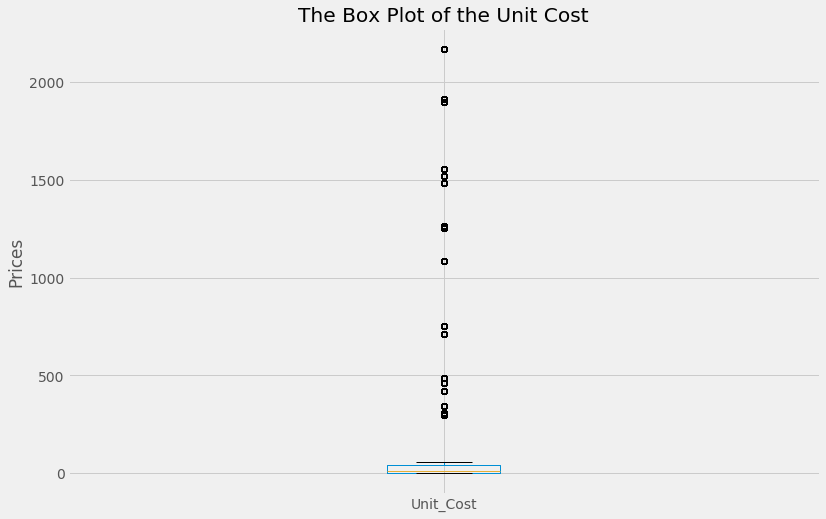

In [29]:
sales['Unit_Cost'].plot(kind='box')
plt.title('The Box Plot of the Unit Cost')
plt.ylabel('Prices')

Text(0.5, 1.0, 'The Density Plot of the Unit Cost')

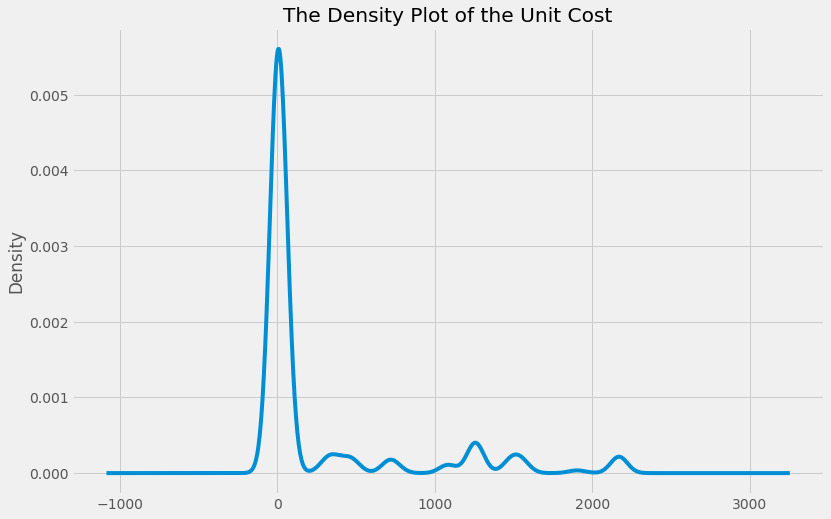

In [30]:
sales['Unit_Cost'].plot(kind='density')
plt.title('The Density Plot of the Unit Cost')

Text(0.5, 1.0, 'The Density Plot of the Unit Cost with Mean and Median')

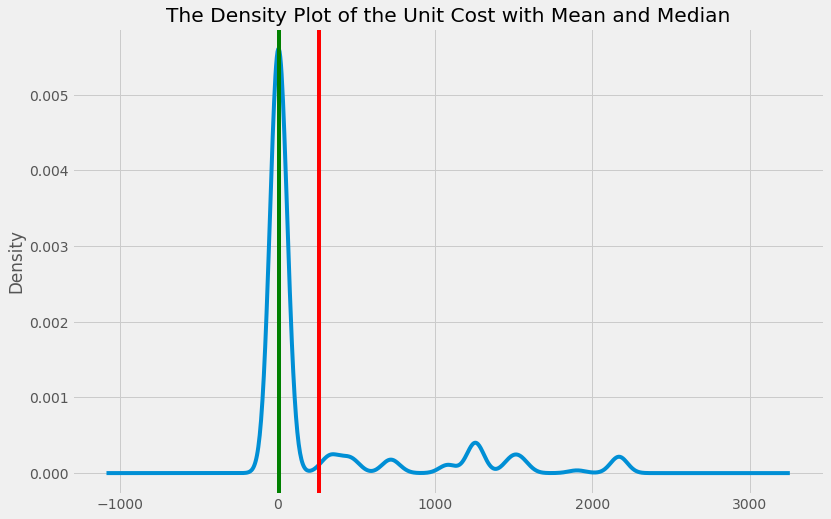

In [33]:
uc = sales['Unit_Cost'].plot(kind='density')
uc.axvline(sales['Unit_Cost'].mean(), color='red')
uc.axvline(sales['Unit_Cost'].median(), color='green')
plt.title('The Density Plot of the Unit Cost with Mean and Median')

Text(0.5, 1.0, 'The Histogram Plot of the Unit Cost')

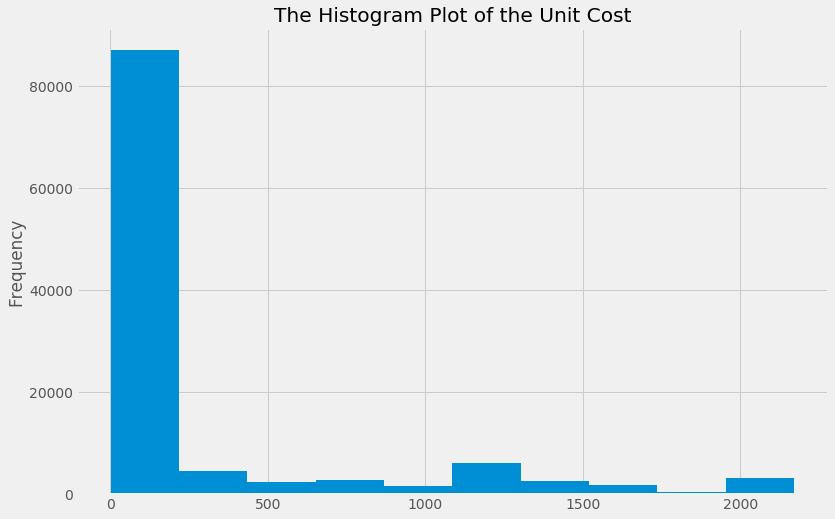

In [34]:
sales['Unit_Cost'].plot(kind='hist')
plt.title('The Histogram Plot of the Unit Cost')

In [35]:
# Comparing purchase data based on Gender
sales['Customer_Gender'].value_counts()

M    58312
F    54724
Name: Customer_Gender, dtype: int64

Text(0.5, 0, 'Gender')

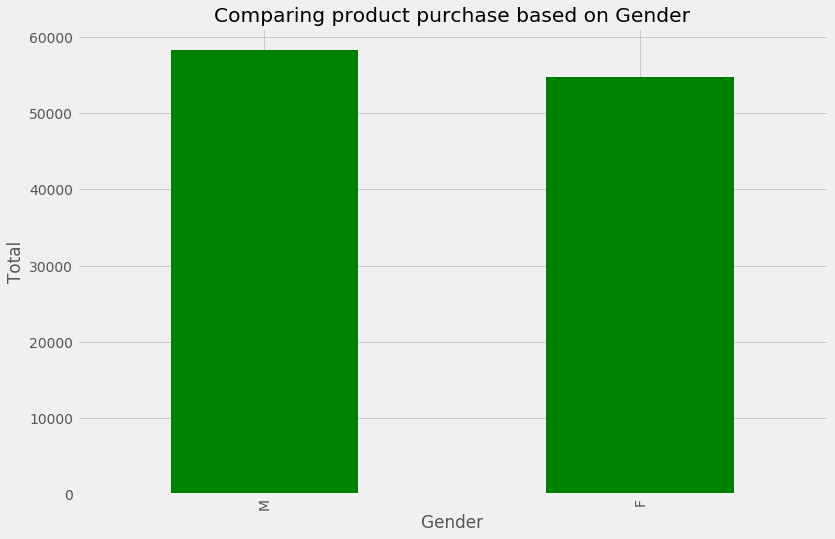

In [39]:
sales['Customer_Gender'].value_counts().plot(kind='bar', color= 'green')
plt.title('Comparing product purchase based on Gender')
plt.ylabel('Total')
plt.xlabel('Gender')

Text(0.5, 1.0, 'Comparing product purchase based on Gender')

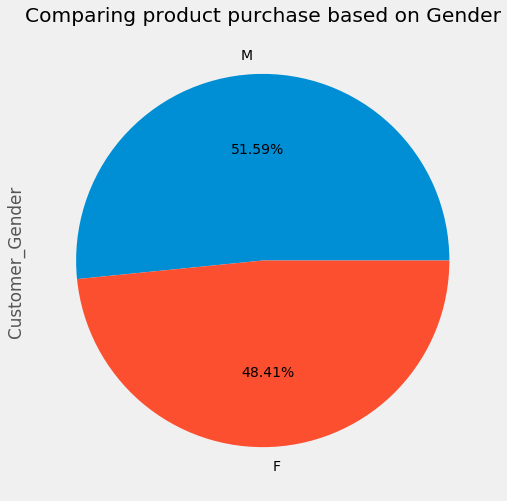

In [40]:
sales['Customer_Gender'].value_counts().plot(kind='pie', autopct='%1.2f%%')
plt.title('Comparing product purchase based on Gender')

In [41]:
# Comparing purchase data based on Age Group
sales['Age_Group'].value_counts()

Adults (35-64)          55824
Young Adults (25-34)    38654
Youth (<25)             17828
Seniors (64+)             730
Name: Age_Group, dtype: int64

Text(0.5, 0, 'Age Category')

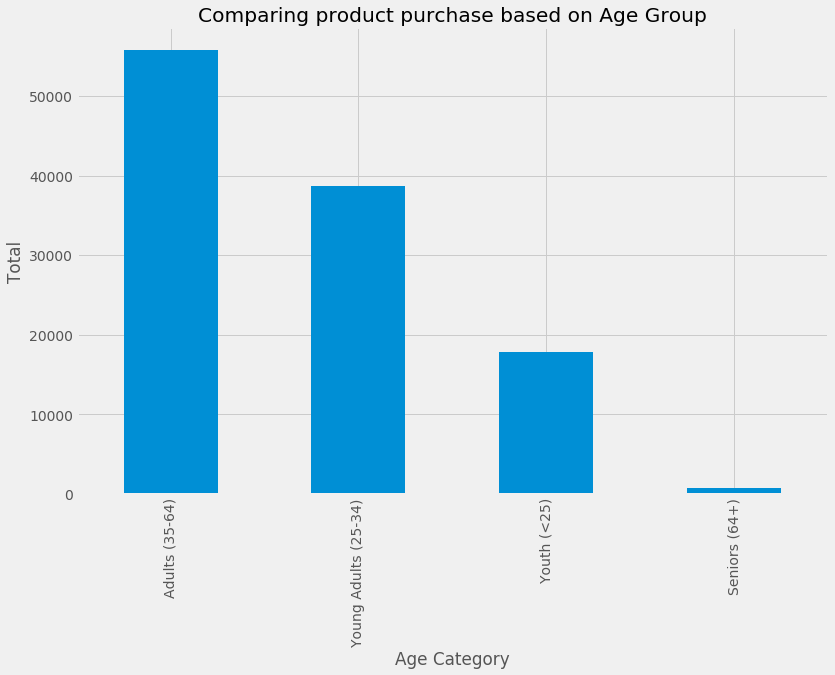

In [42]:
sales['Age_Group'].value_counts().plot(kind='bar')
plt.title('Comparing product purchase based on Age Group')
plt.ylabel('Total')
plt.xlabel('Age Category')

Text(0.5, 1.0, 'Comparing product purchase based on Age Group')

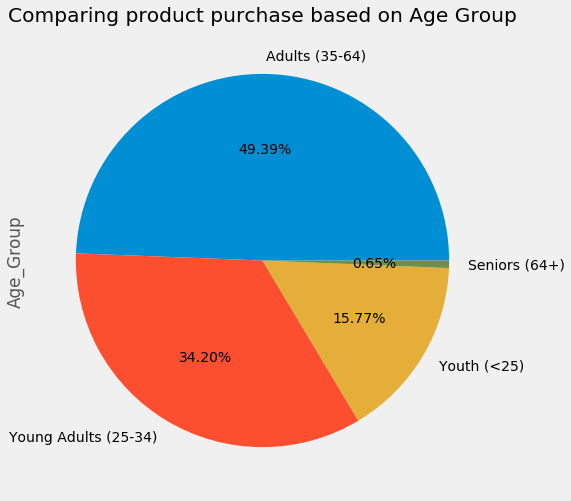

In [43]:
sales['Age_Group'].value_counts().plot(kind='pie', autopct='%1.2f%%')
plt.title('Comparing product purchase based on Age Group')

In [44]:
# Checking Correlation on numeric coloumns using different methods
# understanding the correlation in the dataset (methods are pearson, kendall, spearman)
sales.corr(method='pearson')

,Day,Year,Customer_Age,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
Day,1.000000,-0.007635,-0.014296,-0.002412,0.003133,0.003207,0.004623,0.003329,0.003853
Year,-0.007635,1.000000,0.040994,0.123169,-0.217575,-0.213673,-0.181525,-0.215604,-0.208673
Customer_Age,-0.014296,0.040994,1.000000,0.026887,-0.021374,-0.020262,0.004319,-0.016013,-0.009326
Order_Quantity,-0.002412,0.123169,0.026887,1.000000,-0.515835,-0.515925,-0.238863,-0.340382,-0.312895
Unit_Cost,0.003133,-0.217575,-0.021374,-0.515835,1.000000,0.997894,0.741020,0.829869,0.817865
Unit_Price,0.003207,-0.213673,-0.020262,-0.515925,0.997894,1.000000,0.749870,0.826301,0.818522
Profit,0.004623,-0.181525,0.004319,-0.238863,0.741020,0.749870,1.000000,0.902233,0.956572
Cost,0.003329,-0.215604,-0.016013,-0.340382,0.829869,0.826301,0.902233,1.000000,0.988758
Revenue,0.003853,-0.208673,-0.009326,-0.312895,0.817865,0.818522,0.956572,0.988758,1.000000


In [45]:
# Checking Correlation on numeric coloumns using different methods
# understanding the correlation in the dataset (methods are pearson, kendall, spearman)
sales.corr(method='kendall')

,Day,Year,Customer_Age,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
Day,1.000000,-0.005384,-0.010625,-0.001492,0.003123,0.002799,0.002469,0.001673,0.001664
Year,-0.005384,1.000000,0.030411,0.076686,-0.111474,-0.111029,-0.100614,-0.114645,-0.111411
Customer_Age,-0.010625,0.030411,1.000000,0.014613,0.009343,0.009724,0.017035,0.010009,0.012999
Order_Quantity,-0.001492,0.076686,0.014613,1.000000,-0.364203,-0.362812,-0.048589,-0.078128,-0.064393
Unit_Cost,0.003123,-0.111474,0.009343,-0.364203,1.000000,0.980198,0.626596,0.768262,0.737791
Unit_Price,0.002799,-0.111029,0.009724,-0.362812,0.980198,1.000000,0.641092,0.758341,0.740622
Profit,0.002469,-0.100614,0.017035,-0.048589,0.626596,0.641092,1.000000,0.763302,0.846642
Cost,0.001673,-0.114645,0.010009,-0.078128,0.768262,0.758341,0.763302,1.000000,0.918628
Revenue,0.001664,-0.111411,0.012999,-0.064393,0.737791,0.740622,0.846642,0.918628,1.000000


In [46]:
# Checking Correlation on numeric coloumns using different methods
# understanding the correlation in the dataset (methods are pearson, kendall, spearman)
sales.corr(method='spearman')

,Day,Year,Customer_Age,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
Day,1.000000,-0.007178,-0.015460,-0.002136,0.004424,0.003974,0.003640,0.002463,0.002458
Year,-0.007178,1.000000,0.040676,0.103255,-0.145307,-0.145183,-0.134549,-0.152700,-0.148825
Customer_Age,-0.015460,0.040676,1.000000,0.021300,0.013591,0.014191,0.025350,0.015114,0.019503
Order_Quantity,-0.002136,0.103255,0.021300,1.000000,-0.508816,-0.508450,-0.125003,-0.196582,-0.166543
Unit_Cost,0.004424,-0.145307,0.013591,-0.508816,1.000000,0.997469,0.800261,0.905088,0.889663
Unit_Price,0.003974,-0.145183,0.014191,-0.508450,0.997469,1.000000,0.816340,0.900870,0.892268
Profit,0.003640,-0.134549,0.025350,-0.125003,0.800261,0.816340,1.000000,0.894711,0.943886
Cost,0.002463,-0.152700,0.015114,-0.196582,0.905088,0.900870,0.894711,1.000000,0.988729
Revenue,0.002458,-0.148825,0.019503,-0.166543,0.889663,0.892268,0.943886,0.988729,1.000000


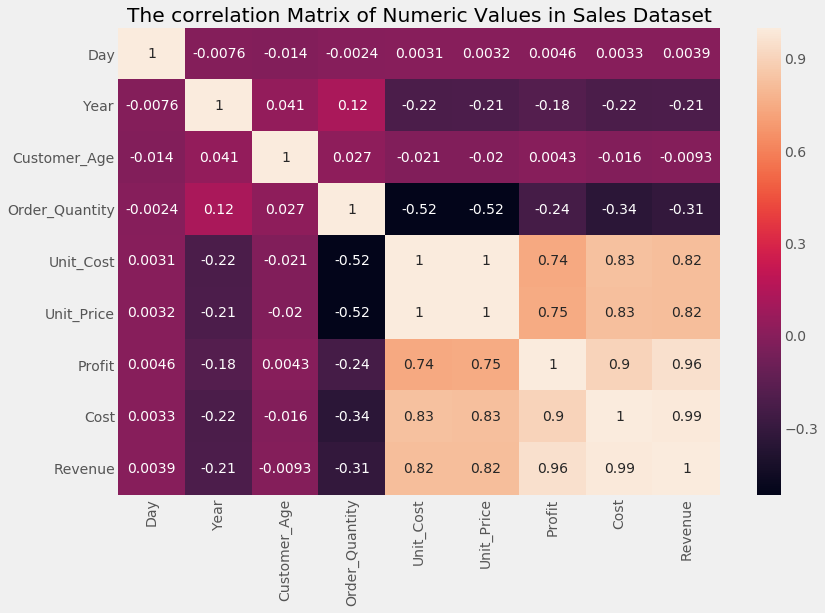

In [48]:
#Visualizing the correlation matrix

correlation_matrix = sales.corr(method='pearson')
sns.heatmap(correlation_matrix, annot=True)
# fix for mpl bug that cuts off top/bottom of seaborn viz
b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values
# Labelling the viz
plt.title('The correlation Matrix of Numeric Values in Sales Dataset')
plt.show()

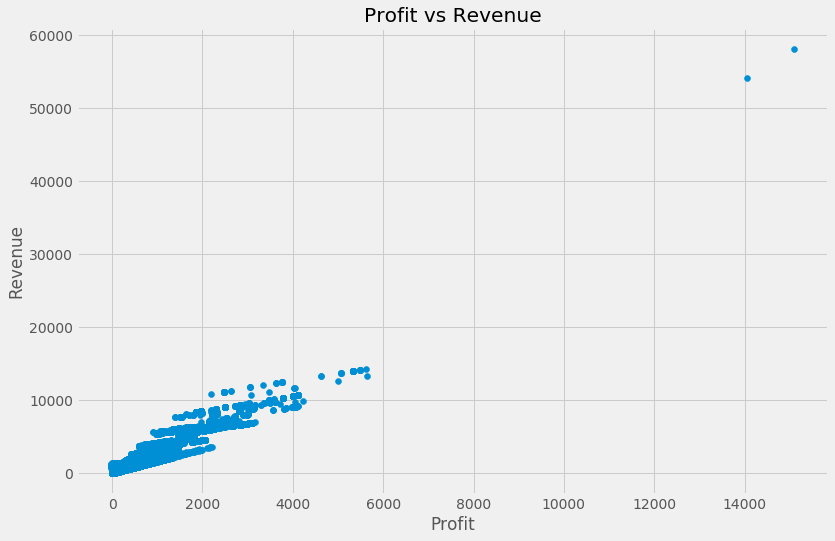

In [50]:
# Scatter plot to compare Profit and Revenue
plt.scatter(x=sales['Profit'], y=sales['Revenue'])
plt.title('Profit vs Revenue')
plt.xlabel('Profit')
plt.ylabel('Revenue')
plt.show()

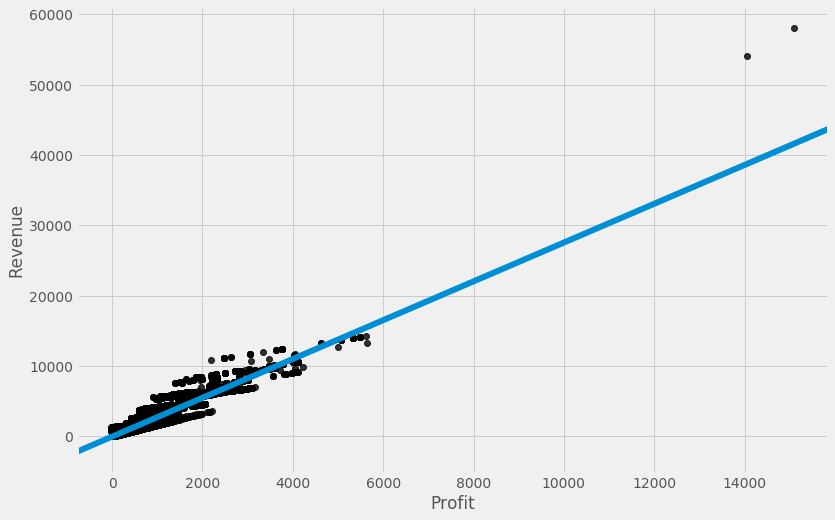

In [52]:
# ploting Profit vs Revenue
sns.regplot(x="Profit", y="Revenue", data=sales, scatter_kws={'color':'black'})

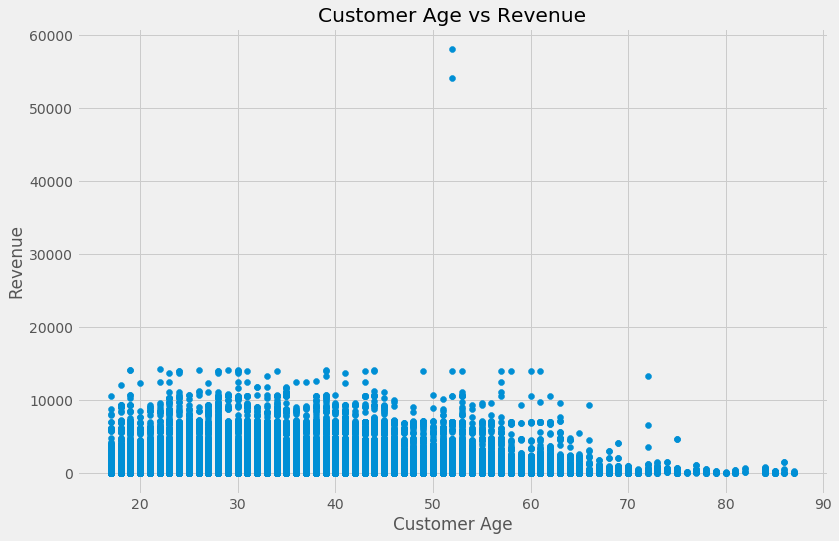

In [53]:
# Scatter plot to compare Customer Age and Revenue
plt.scatter(x=sales['Customer_Age'], y=sales['Revenue'])
plt.title('Customer Age vs Revenue')
plt.xlabel('Customer Age')
plt.ylabel('Revenue')
plt.show()

Text(0, 0.5, 'Profit')

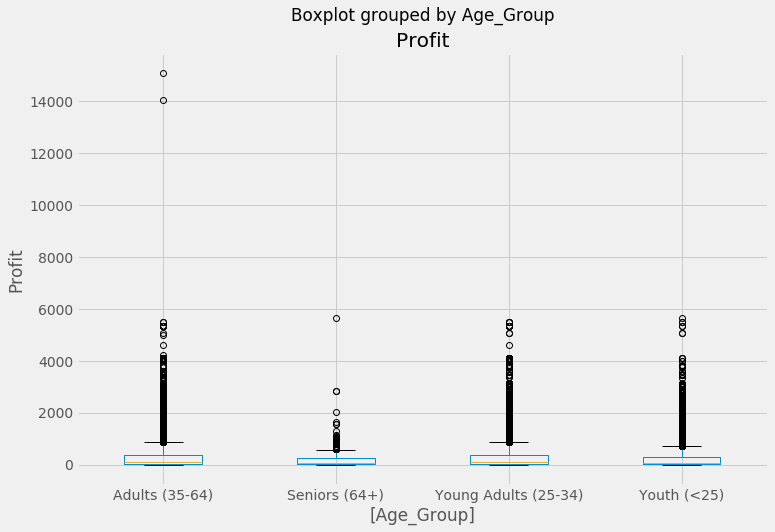

In [56]:
# The boxplot of Profit and Age Group
uc = sales[['Profit', 'Age_Group']].boxplot(by='Age_Group')
plt.ylabel('Profit')

Year                  AxesSubplot(0.08,0.511818;0.255882x0.368182)
Customer_Age      AxesSubplot(0.387059,0.511818;0.255882x0.368182)
Order_Quantity    AxesSubplot(0.694118,0.511818;0.255882x0.368182)
Unit_Cost                 AxesSubplot(0.08,0.07;0.255882x0.368182)
Unit_Price            AxesSubplot(0.387059,0.07;0.255882x0.368182)
Profit                AxesSubplot(0.694118,0.07;0.255882x0.368182)
dtype: object

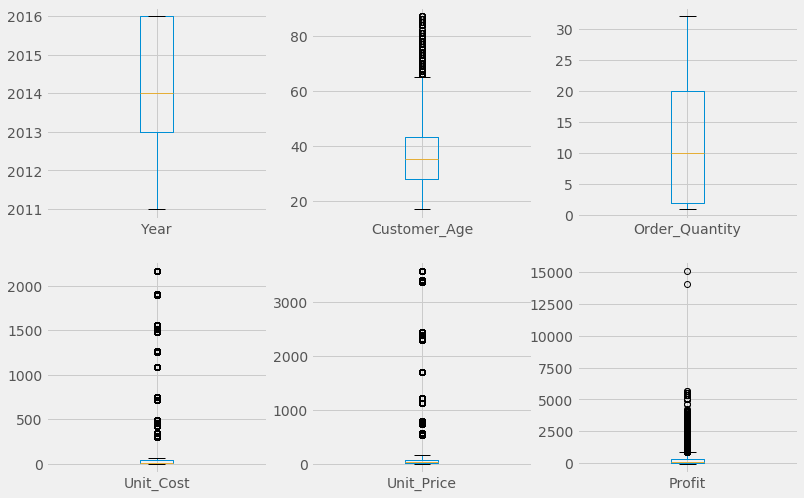

In [61]:
# The subplot of six selected columns
boxplot_cols = ['Year', 'Customer_Age', 'Order_Quantity', 'Unit_Cost', 'Unit_Price', 'Profit']
sales[boxplot_cols].plot(kind='box', subplots=True,layout=(2,3))

# Stage 5: Adding more columns to our Dataset

In [69]:
# To calculate Revenue by Age
sales['Revenue_per_Age'] = sales['Revenue']/sales['Customer_Age']
sales.head(10)

,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue,Revenue_per_Age
0,2013-11-26,26,November,2013,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950,50.000000
1,2015-11-26,26,November,2015,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950,50.000000
2,2014-03-23,23,March,2014,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,23,45,120,1366,1035,2401,49.000000
3,2016-03-23,23,March,2016,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,20,45,120,1188,900,2088,42.612245
4,2014-05-15,15,May,2014,47,Adults (35-64),F,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,4,45,120,238,180,418,8.893617
5,2016-05-15,15,May,2016,47,Adults (35-64),F,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,5,45,120,297,225,522,11.106383
6,2014-05-22,22,May,2014,47,Adults (35-64),F,Australia,Victoria,Accessories,Bike Racks,Hitch Rack - 4-Bike,4,45,120,199,180,379,8.063830
7,2016-05-22,22,May,2016,47,Adults (35-64),F,Australia,Victoria,Accessories,Bike Racks,Hitch Rack - 4-Bike,2,45,120,100,90,190,4.042553
8,2014-02-22,22,February,2014,35,Adults (35-64),M,Australia,Victoria,Accessories,Bike Racks,Hitch Rack - 4-Bike,22,45,120,1096,990,2086,59.600000
9,2016-02-22,22,February,2016,35,Adults (35-64),M,Australia,Victoria,Accessories,Bike Racks,Hitch Rack - 4-Bike,21,45,120,1046,945,1991,56.885714


Text(0.5, 0, 'Age')

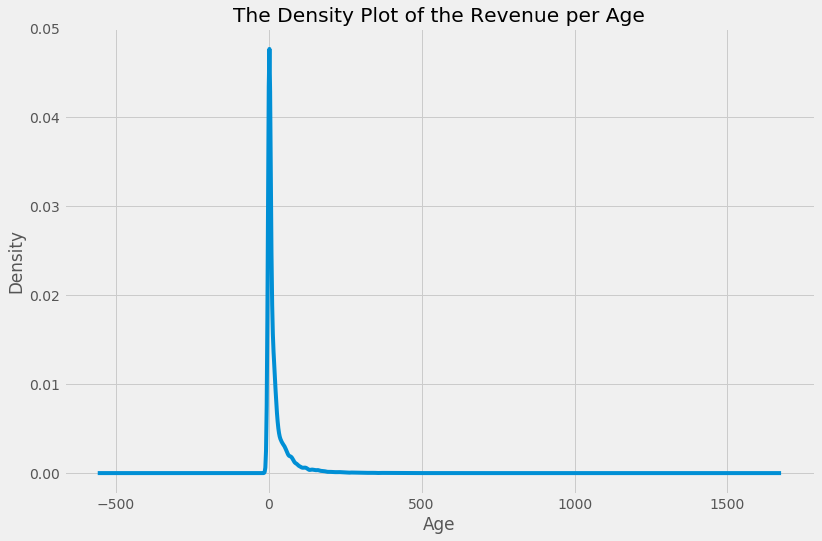

In [72]:
# To determine the distribution of Revenue over Age
sales['Revenue_per_Age'].plot(kind='density')
plt.title('The Density Plot of the Revenue per Age')
plt.xlabel('Age')

Text(0.5, 0, 'Age')

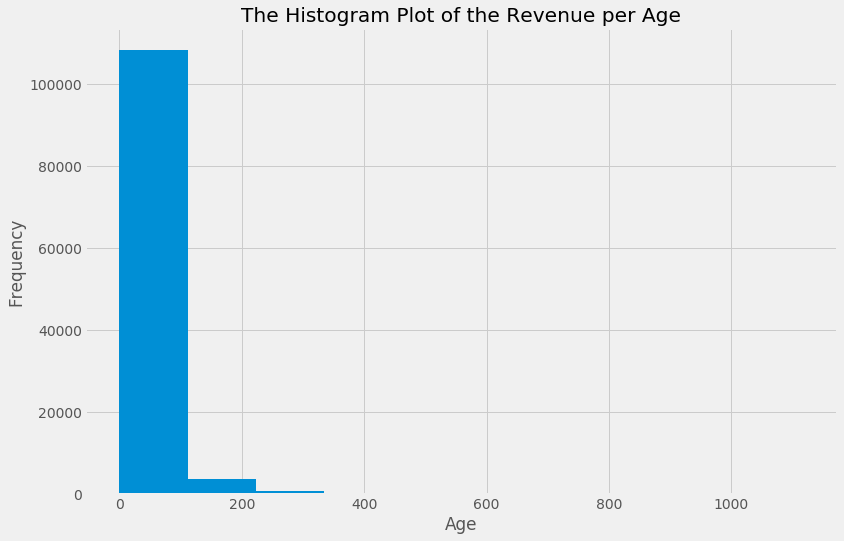

In [73]:
# To determine the distribution of Revenue over Age
sales['Revenue_per_Age'].plot(kind='hist')
plt.title('The Histogram Plot of the Revenue per Age')
plt.xlabel('Age')

In [74]:
# To determine the recalculated cost
sales['Calculated_Cost'] = sales['Order_Quantity'] * sales['Unit_Cost']
sales.head(7)

,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue,Revenue_per_Age,Calculated_Cost
0,2013-11-26,26,November,2013,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950,50.000000,360
1,2015-11-26,26,November,2015,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950,50.000000,360
2,2014-03-23,23,March,2014,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,23,45,120,1366,1035,2401,49.000000,1035
3,2016-03-23,23,March,2016,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,20,45,120,1188,900,2088,42.612245,900
4,2014-05-15,15,May,2014,47,Adults (35-64),F,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,4,45,120,238,180,418,8.893617,180
5,2016-05-15,15,May,2016,47,Adults (35-64),F,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,5,45,120,297,225,522,11.106383,225
6,2014-05-22,22,May,2014,47,Adults (35-64),F,Australia,Victoria,Accessories,Bike Racks,Hitch Rack - 4-Bike,4,45,120,199,180,379,8.063830,180


In [76]:
# To determine the difference between Calculated Cost and Original Cost
(sales['Calculated_Cost'] != sales['Cost']).sum()


0

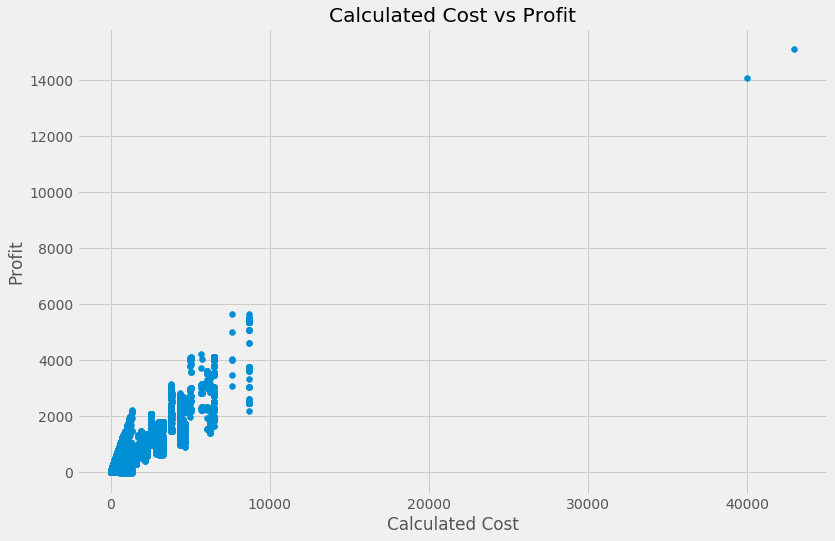

In [77]:
# Scatter plot to compare Customer Age and Revenue
plt.scatter(x=sales['Calculated_Cost'], y=sales['Profit'])
plt.title('Calculated Cost vs Profit')
plt.xlabel('Calculated Cost')
plt.ylabel('Profit')
plt.show()

In [80]:
# To determine total Revenue based on Product Category
gross_revenue = sales.groupby('Product_Category')[["Revenue"]].sum()
gross_revenue

,Revenue
Product_Category,
Accessories,15117992
Bikes,61782134
Clothing,8370882


Text(0.5, 1.0, 'Comparing Revenue based on Product Category')

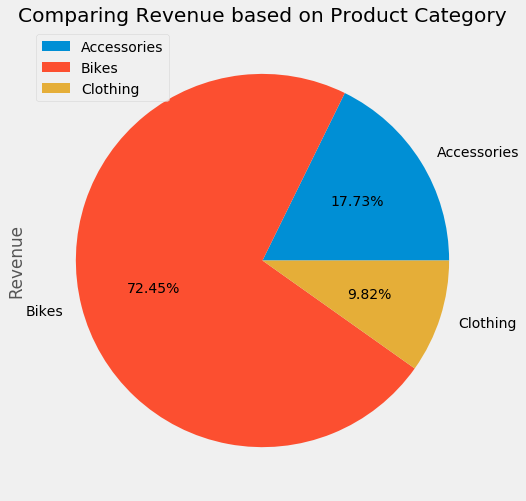

In [84]:
gross_revenue.plot(kind='pie', subplots=True, autopct='%1.2f%%')
plt.title('Comparing Revenue based on Product Category')

# Stage 6: Summary of findings
1 There is a 0.82 correlationship between Unit Cost and Revenue <br>
2 There is a 0.82 correlationship beween Unit Price and Revenue <br>
3 There is a 0.96 correlationship between Profit and Revenue <br>
4 There is a 0.99 correlationship beween Cost and Revenue <br>
5 There is a 0.74 correlationship between Unit Cost and Profit <br>
6 There is a 0.75 correlationship beween Unit Price and Profit <br>
7 There is a 0.90 correlationship between Cost and Profit <br>
<br>
8   51.59% of male and 48.41% purchased all items from the store  <br>
9   49.39% was done by Adults in (35-64)years old <br>
10  34.20% was done by Young Adults in (25-34)years old <br>
11  15.77% was done by Youths in (<25)years old <br>
12   0.65% was done by Seniors in (>64)years old <br>
<br>
13   72.45% of the revenue came from sales of Bikes <br>
14   17.73% of the revenue came from sales of Accessories <br>
15   9.82% of the revenue came from sales of Clothing <br>